In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
file = '../database/publication_database.csv'
images = '../publication_images'
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
file = '../database/publication_database.csv'


ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('omphacite')
model_names

['zhang_19_omph', 'Liu_19_omph', 'Liu_21_omph']

# Exploring Pyrrhenious's Omphacite Ensembles

Here we look at Omphacite models parameterization ensembles of:

 
 * Zhang et al., 2019. Electrical Conductivity of Omphacite as a Function of Water Content and Implications for High Conductivity Anomalies in the Dabie-Sulu UHPM Belts and Tibet
  
 * Liu et al., 2019. Electrical conductivity of OH-bearing omphacite and garnet in eclogite: the quantitative dependence on water content
  
 * Liu et al., 2021. Electrical conductivity of omphacite and garnet indicates limited deep water recycling by crust subduction.

 

## Dry Trends


Text(0, 0.5, 'log10(sigma)')

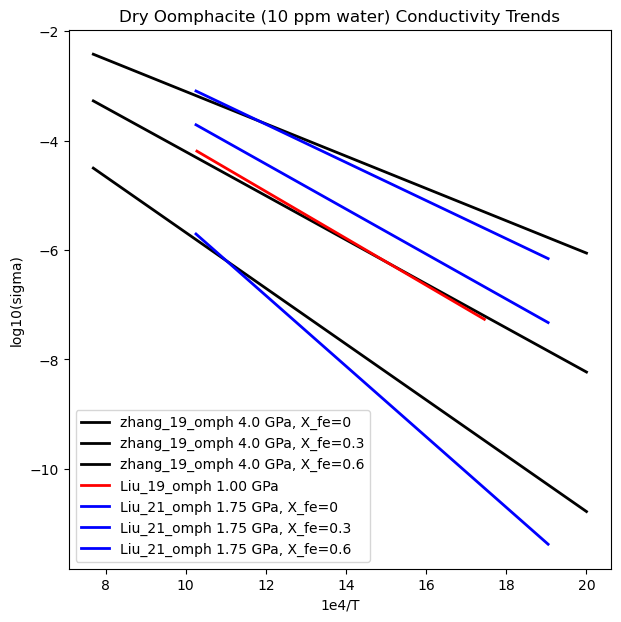

In [19]:
import matplotlib.cm as cm
model_names = ecdatabase.get_model_list_for_phase('omphacite')
fix, ax = plt.subplots(figsize=(7,7))

for i, model in enumerate(model_names):
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.arange(ec_model_row['temp_min'].values[0],
                                    ec_model_row['temp_max'].values[0],1)
    pressure = ec_model_row['pressure_average'].values[0]
    for iron in [0,0.3,0.6]:    
        ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,Cw=10,X_fe=iron)),
            linewidth=2,label=model+f' {pressure} GPa, X_fe={iron}',color='black')

for i, model in enumerate(filter(lambda x : 'Liu' in x and '19' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_min'],
                                    ec_model_row['temp_max'],num=100,dtype=float).ravel()
    pressure = ec_model_row['pressure_average'].values[0]
        

    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,Cw=10)),
            linewidth=2,label=model+f' {pressure} GPa',color='red')
    
for i, model in enumerate(filter(lambda x : 'Liu' in x and '21' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_min'],
                                    ec_model_row['temp_max'],num=100,dtype=float).ravel()
    pressure = ec_model_row['pressure_average'].values[0]
        
    for iron in [0,0.3,0.6]:    
        ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,Cw=10,X_fe=iron)),
            linewidth=2,label=model+f' {pressure} GPa, X_fe={iron}',color='blue')
    

plt.legend(loc='lower left')
plt.title('Dry Oomphacite (10 ppm water) Conductivity Trends')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')


In [20]:
model_names = ecdatabase.get_model_list_for_phase('omphacite')
temperature_range_out = np.arange(300,2201,1).ravel()
inbounds=[]
out_of_bounds=[]
for model_name in model_names: 
    for iron in [0,0.3,0.6]:
        ec_model_row = ecdatabase.get_model_properties(model_name)
        temperature_range_in = np.arange(int(ec_model_row['temp_min'].values[0]),
                                      int(ec_model_row['temp_max'].values[0]),1).ravel()
        ecmodel = ecdatabase.get_model(model_name)
        c1 = ecmodel.get_conductivity(T=temperature_range_in,Cw=10,X_fe=iron)
        c2 = ecmodel.get_conductivity(T=temperature_range_out,Cw=10,X_fe=iron)
        inbounds.append(pd.Series(c1,name=model_name+'_',index=temperature_range_in))
        out_of_bounds.append(pd.Series(c2,name=model_name,index=temperature_range_out))


In [22]:
within_experiments = np.log10(pd.concat(inbounds,axis=1).sort_index())
extrapolated = np.log10(pd.concat(out_of_bounds,axis=1).sort_index())
extrapolated

,zhang_19_omph,zhang_19_omph,zhang_19_omph,Liu_19_omph,Liu_19_omph,Liu_19_omph,Liu_21_omph,Liu_21_omph,Liu_21_omph
300,-17.579577,-13.598392,-9.993057,-14.067692,-14.067692,-14.067692,-20.598143,-13.203900,-11.137006
301,-17.523096,-13.553799,-9.960352,-14.020257,-14.020257,-14.020257,-20.526684,-13.158345,-11.098408
302,-17.466989,-13.509501,-9.927864,-13.973137,-13.973137,-13.973137,-20.455698,-13.113092,-11.060065
303,-17.411253,-13.465496,-9.895590,-13.926328,-13.926328,-13.926328,-20.385180,-13.068137,-11.021975
304,-17.355883,-13.421780,-9.863528,-13.879827,-13.879827,-13.879827,-20.315126,-13.023478,-10.984136
...,...,...,...,...,...,...,...,...,...
2196,-2.901361,-2.009588,-1.493665,-1.740504,-1.740504,-1.740504,-2.027275,-1.365028,-1.106057
2197,-2.900304,-2.008753,-1.493053,-1.739617,-1.739617,-1.739617,-2.025938,-1.364176,-1.105334
2198,-2.899248,-2.007920,-1.492441,-1.738730,-1.738730,-1.738730,-2.024602,-1.363324,-1.104612
2199,-2.898193,-2.007087,-1.491830,-1.737843,-1.737843,-1.737843,-2.023266,-1.362473,-1.103891


In [23]:
within_experiments.sort_index(inplace=True)
within_experiments

,zhang_19_omph_,zhang_19_omph_,zhang_19_omph_,Liu_19_omph_,Liu_19_omph_,Liu_19_omph_,Liu_21_omph_,Liu_21_omph_,Liu_21_omph_
500,-10.779290,-8.229402,-6.055364,NaN,NaN,NaN,NaN,NaN,NaN
501,-10.758929,-8.213327,-6.043575,NaN,NaN,NaN,NaN,NaN,NaN
502,-10.738650,-8.197316,-6.031832,NaN,NaN,NaN,NaN,NaN,NaN
503,-10.718452,-8.181369,-6.020136,NaN,NaN,NaN,NaN,NaN,NaN
504,-10.698334,-8.165485,-6.008487,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1295,-4.517249,-3.285370,-2.429342,NaN,NaN,NaN,NaN,NaN,NaN
1296,-4.514210,-3.282971,-2.427582,NaN,NaN,NaN,NaN,NaN,NaN
1297,-4.511176,-3.280576,-2.425825,NaN,NaN,NaN,NaN,NaN,NaN
1298,-4.508146,-3.278184,-2.424071,NaN,NaN,NaN,NaN,NaN,NaN


## Wet vs Dry Oomphacite Trends

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_89561/4285439699.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color=cm.get_cmap('cool_r')(i/(len(water)+1)))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_89561/4285439699.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color=cm.get_cmap('cool_r')(i/(len(water)+1)))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_89561/4285439699.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  

(-8.0, 3.0)

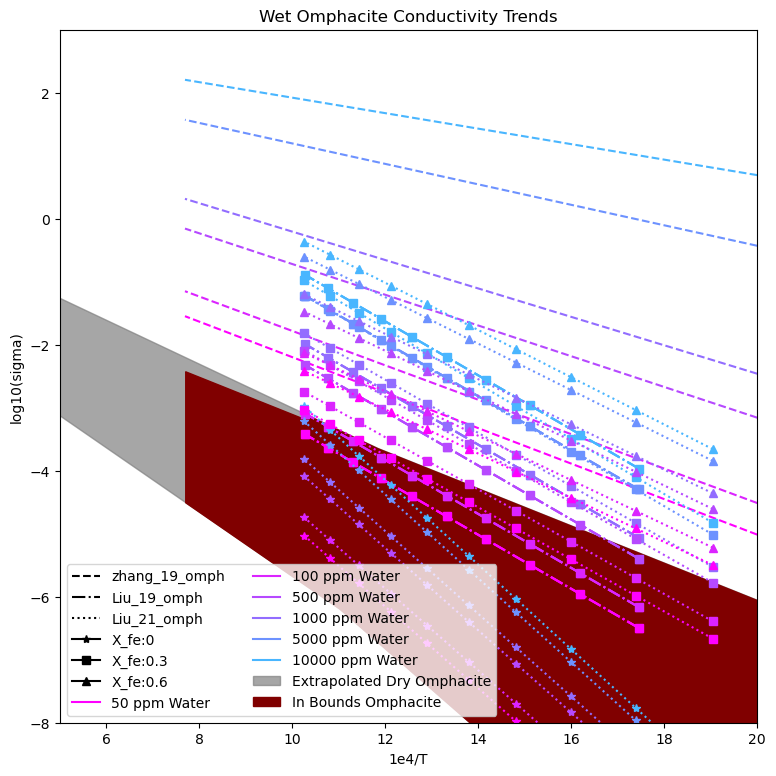

In [38]:
fix, ax = plt.subplots(figsize=(9,9))
water = [50,100,500,1000,5000,10000]
for model in model_names:
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_min'],
                                    ec_model_row['temp_max'],num=10,dtype=float).ravel()
    if 'zhang' in model:
        linestyle='--'
    elif '21' in model:
        linestyle=':'
    else:
        linestyle='-.'
    if 'zhang' not in model:
        for iron, marker in zip([0,0.3,0.6],['*','s','^']):  
            for i, ppm_h2o in enumerate(water):
                c = ec_model.get_conductivity(T=temperature_range,Cw=ppm_h2o,X_fe=iron)
                ax.plot(1e4/temperature_range,
                np.log10(c),marker=marker,linestyle=linestyle,
                        color=cm.get_cmap('cool_r')(i/(len(water)+1)))
    else:
        for i, ppm_h2o in enumerate(water):
            c = ec_model.get_conductivity(T=temperature_range,Cw=ppm_h2o,X_fe=iron)
            ax.plot(1e4/temperature_range,
                np.log10(c),linestyle=linestyle,
                        color=cm.get_cmap('cool_r')(i/(len(water)+1)))
for model in model_names:
    if 'zhang' in model:
        linestyle='--'
    elif '21' in model:
        linestyle=':'
    else:
        linestyle='-.'
    plt.plot([],[],linestyle=linestyle,label=model,color='black')
    
for iron, marker in zip([0,0.3,0.6],['*','s','^']):  
    plt.plot([],[],marker=marker,label=f'X_fe:{iron}',color='black')
for i, ppm_h2o in enumerate(water):
    ax.plot([],[],label=f'{ppm_h2o} ppm Water',color=cm.get_cmap('cool_r')(i/(len(water)+1)))

ax.fill_between(1e4/extrapolated.index, 
                extrapolated.min(axis=1)-extrapolated.min(axis=1)*1e-3,
                extrapolated.max(axis=1),label='Extrapolated Dry Omphacite',color='grey',alpha=0.7) 
ax.fill_between(1e4/within_experiments.index, 
                within_experiments.min(axis=1)-within_experiments.min(axis=1)*1e-3,
                within_experiments.max(axis=1),label='In Bounds Omphacite',color='maroon') 
plt.xlim([5,20])
plt.legend(ncols=2,loc='lower left')
plt.title('Wet Omphacite Conductivity Trends')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')
plt.ylim([-8,3])